### Data Description
​
The dataset is the Cleveland Heart Disease dataset taken from the UCI repository. This dataset consists of 13 features and a target variable. It has 8 nominal variables and 5 numeric variables. The detailed description of all these features are as follows:
​
1. Age: Patients Age in years (Numeric)
2. Sex: Gender  (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term  categorized into 4 category.
                  0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values 
                 0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
                 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise  
                  0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia 
                 0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart)  3: reversible defect (a blood flow is observed but it is not normal(nominal)
14. target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('/kaggle/input/heart-disease-cleveland/Heart_disease_cleveland_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [6]:
#data cleaning , scaling and encoding
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','ca','thalassemia','target']

In [8]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,ca,thalassemia,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [9]:
# converting features to categorical features 
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina '
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'Abnormality in ST-T wave'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'null'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal blood flow'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [10]:
df['chest_pain_type'].value_counts()

asymptomatic       144
non-angina pain     86
atypical angina     50
typical angina      23
Name: chest_pain_type, dtype: int64

In [11]:
df['rest_ecg'].value_counts()

normal                          151
left ventricular hypertrophy    148
Abnormality in ST-T wave          4
Name: rest_ecg, dtype: int64

In [12]:
df['st_slope'].value_counts()

upsloping      142
flat           140
downsloping     21
Name: st_slope, dtype: int64

In [13]:
df['thalassemia'].value_counts()

fixed defect         168
reversible defect    117
normal blood flow     18
Name: thalassemia, dtype: int64

In [14]:
# checking the  dataset after  encoding
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,ca,thalassemia,target
0,63,male,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,normal blood flow,0
1,67,male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,flat,3,fixed defect,1
2,67,male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,flat,2,reversible defect,1
3,37,male,non-angina pain,130,250,0,normal,187,0,3.5,downsloping,0,fixed defect,0
4,41,female,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,fixed defect,0


In [15]:
# Checking missing entries in the dataset columnwise
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
ca                         0
thalassemia                0
target                     0
dtype: int64

In [16]:
# checking the shape of the dataset
df.shape

(303, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  ca                       303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(8), o

In [18]:
df.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,0.148515,149.607261,0.326733,1.039604,0.663366,0.458746
std,9.038662,17.599748,51.776918,0.356198,22.875003,0.469794,1.161075,0.934375,0.499120
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


 * As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas on upper side cholestrol has outlier  also having maximum value of 564.

In [19]:
df.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope,thalassemia
count,303,303,303,303,303
unique,2,4,3,3,3
top,male,asymptomatic,normal,upsloping,fixed defect
freq,206,144,151,142,168


## Distribution of Heart disease on the basis of target 

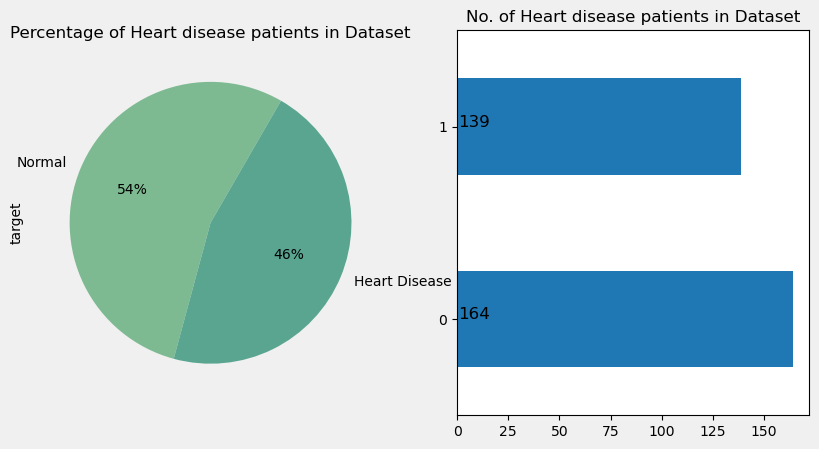

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5),facecolor=(.94, .94, .94))


ax1 = df['target'].value_counts().plot.pie( x ="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 60,ax=ax1,colors = sns.color_palette("crest"));
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh",ax =ax2)
for x,y in enumerate(df["target"].value_counts().values):
    ax2.text(.5,x,y,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()




##  Gender and Agewise Distribution

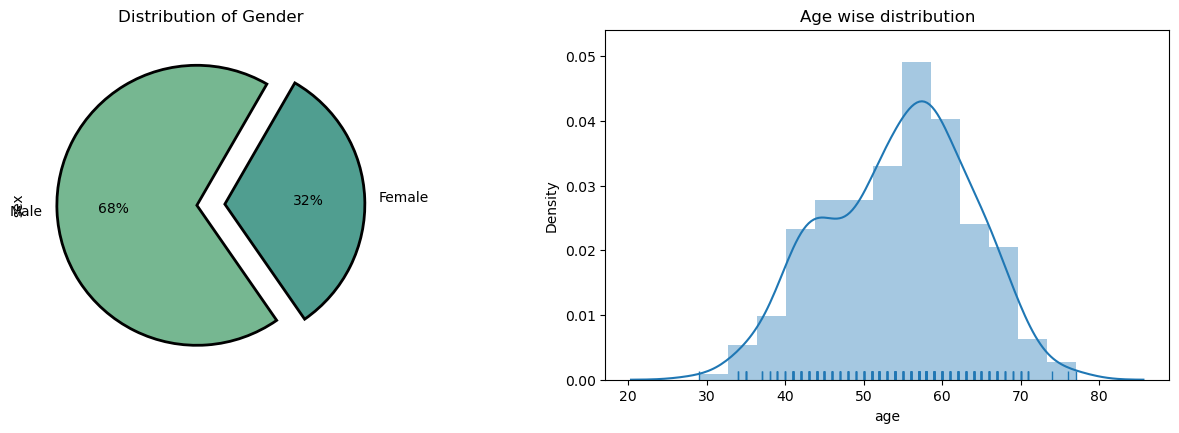

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("crest",5), startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =False)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 60.

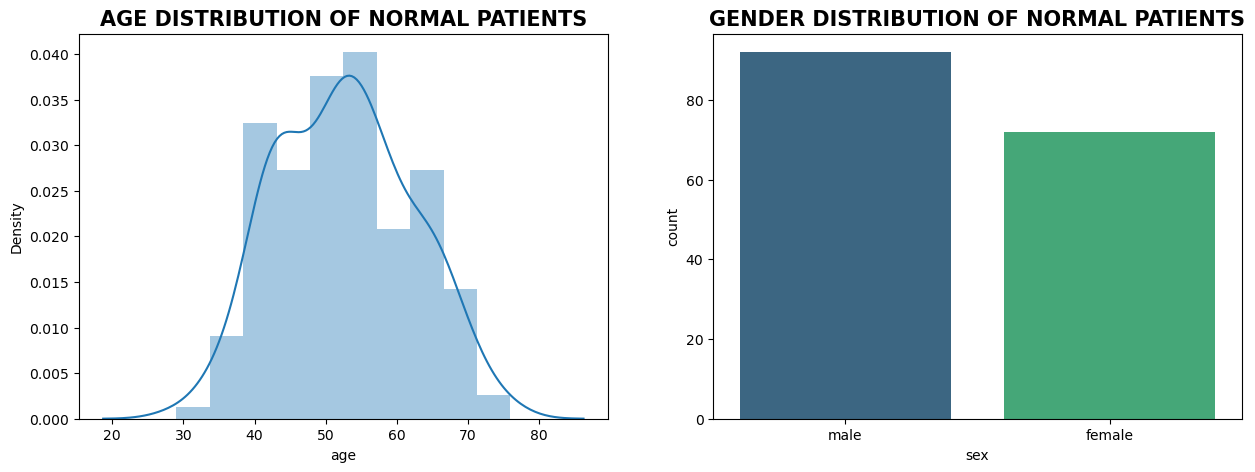

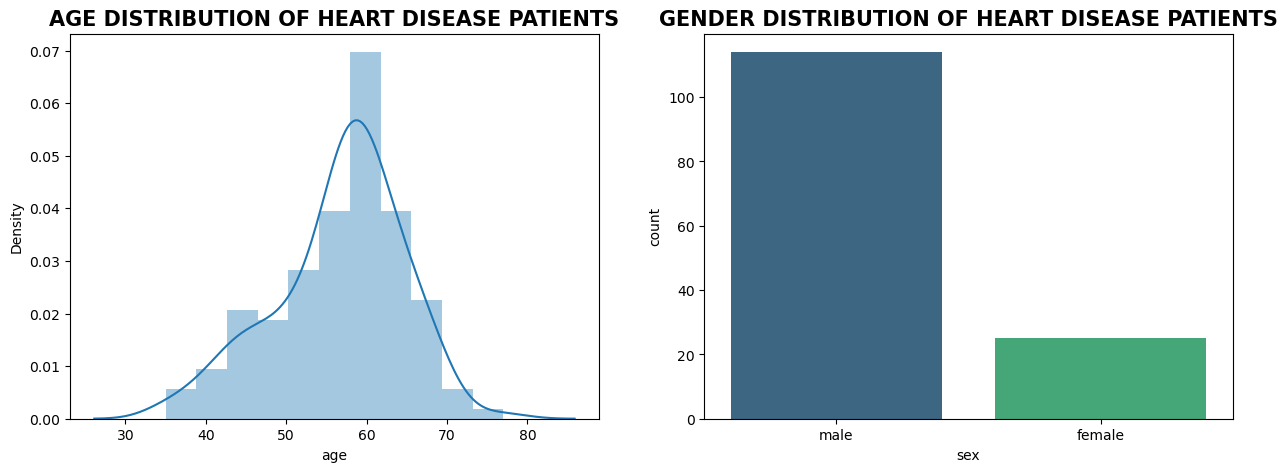

In [22]:
df_1=df[df['target']==1]

df_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

## Distribution of Chest Pain Type

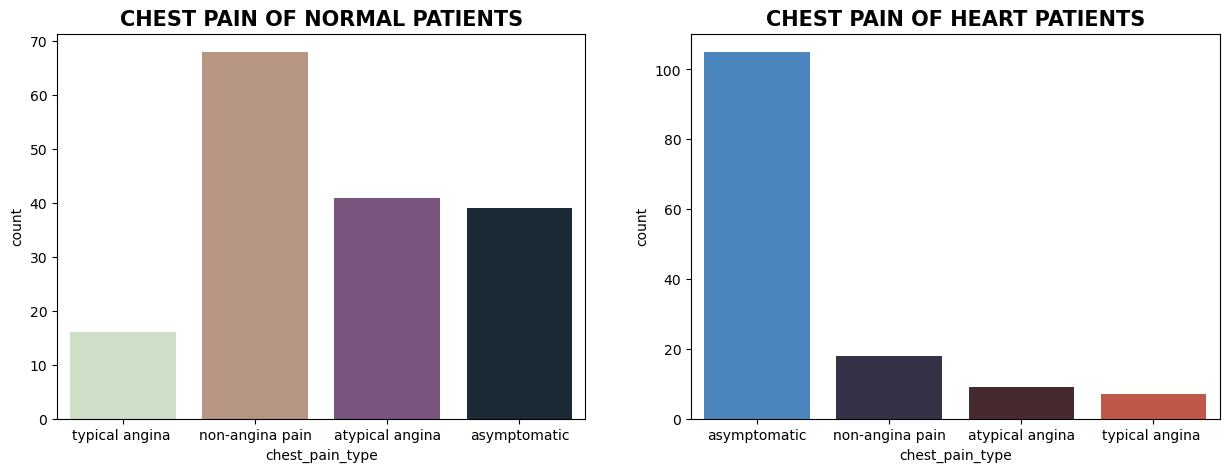

In [23]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['chest_pain_type'],palette = 'ch:start=4.2,rot=-3.3')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['chest_pain_type'], palette='icefire')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [24]:
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,23.780000,75.540000
atypical angina,25.000000,6.470000
non-angina pain,41.460000,12.950000
typical angina,9.760000,5.040000


As we can see from above plot 41% of the chest pain type of the heart disease patients have non-aginal chest pain

## Distribution of Rest ECG

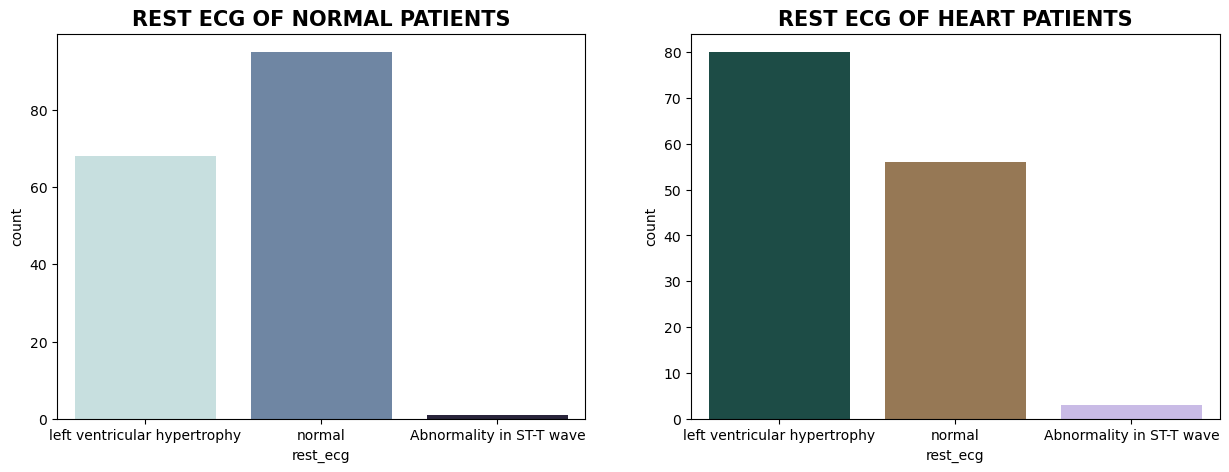

In [25]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['rest_ecg'], palette ='ch:start=.2,rot=-.3')
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['rest_ecg'], palette='cubehelix')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [26]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("white", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
Abnormality in ST-T wave,0.610000,2.160000
left ventricular hypertrophy,41.460000,57.550000
normal,57.930000,40.290000


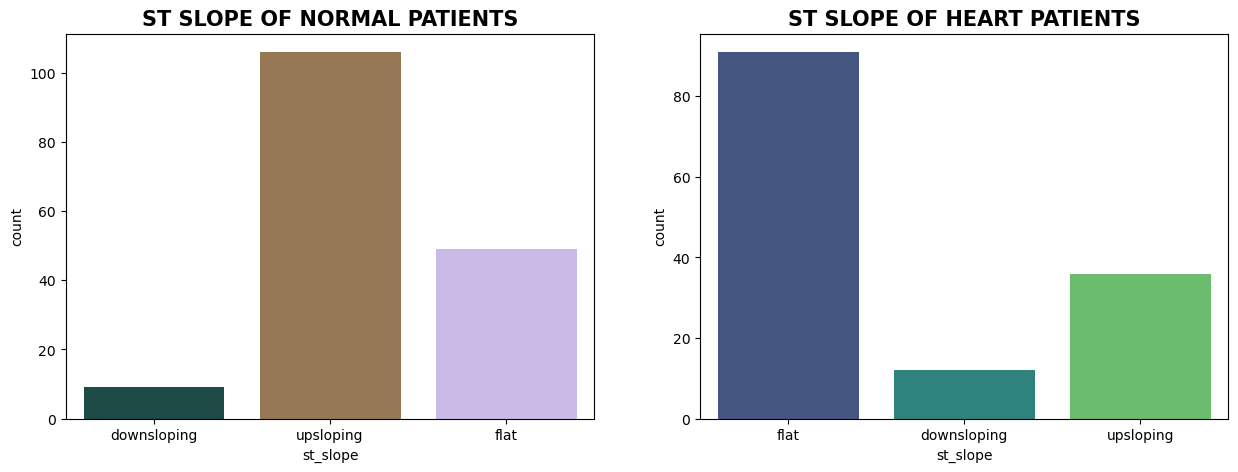

In [27]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['st_slope'],palette='cubehelix')
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [28]:
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,5.490000,8.630000
flat,29.880000,65.470000
upsloping,64.630000,25.900000


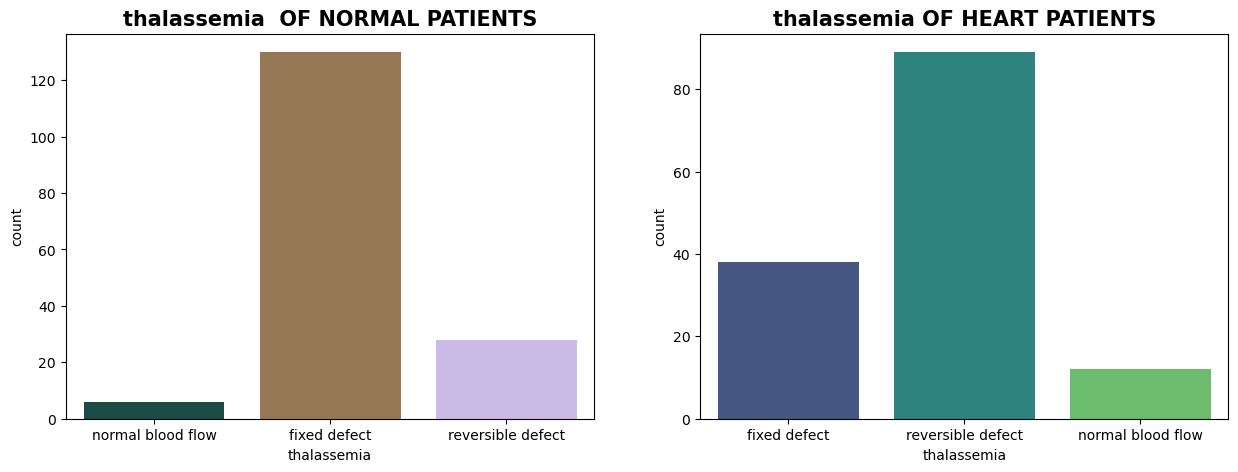

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['thalassemia'],palette='cubehelix')
plt.title('thalassemia  OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['thalassemia'], palette='viridis')
plt.title('thalassemia OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [30]:
plot_criteria= ['thalassemia', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
thalassemia,,
fixed defect,79.270000,27.340000
normal blood flow,3.660000,8.630000
reversible defect,17.070000,64.030000


## Distribution of Numerical features

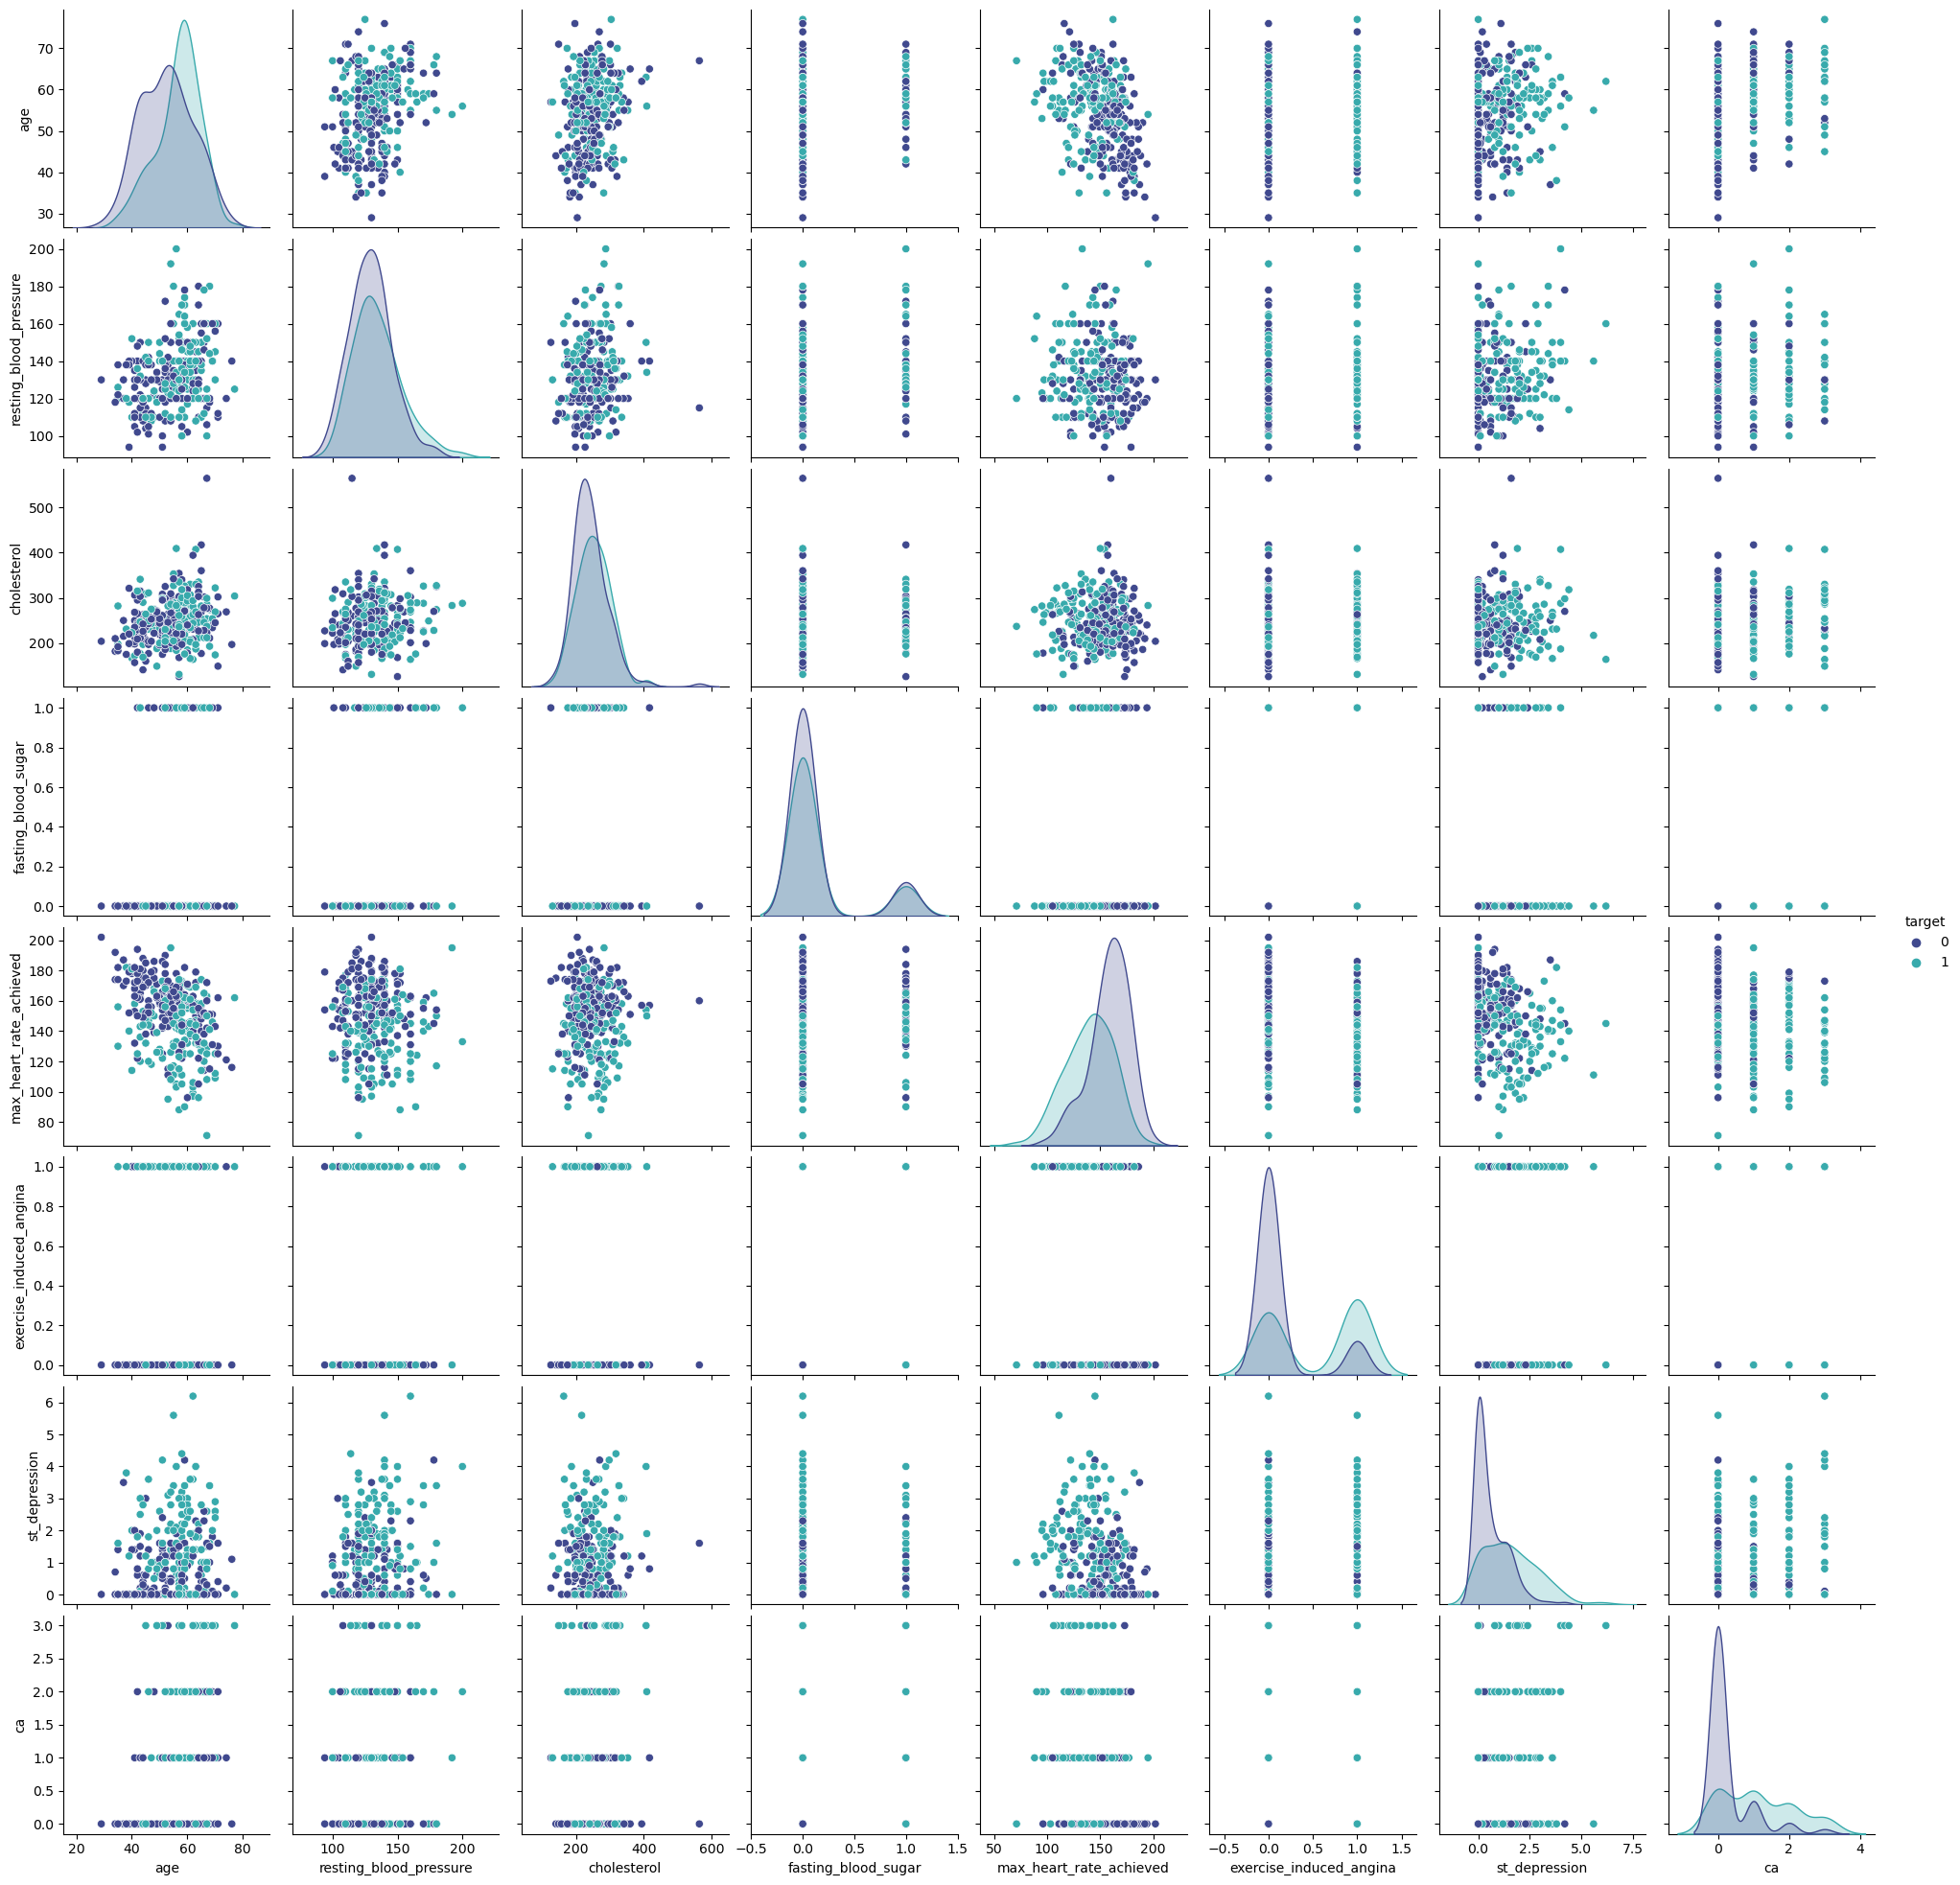

In [31]:
sns.pairplot(df, hue = 'target',palette = 'mako' )

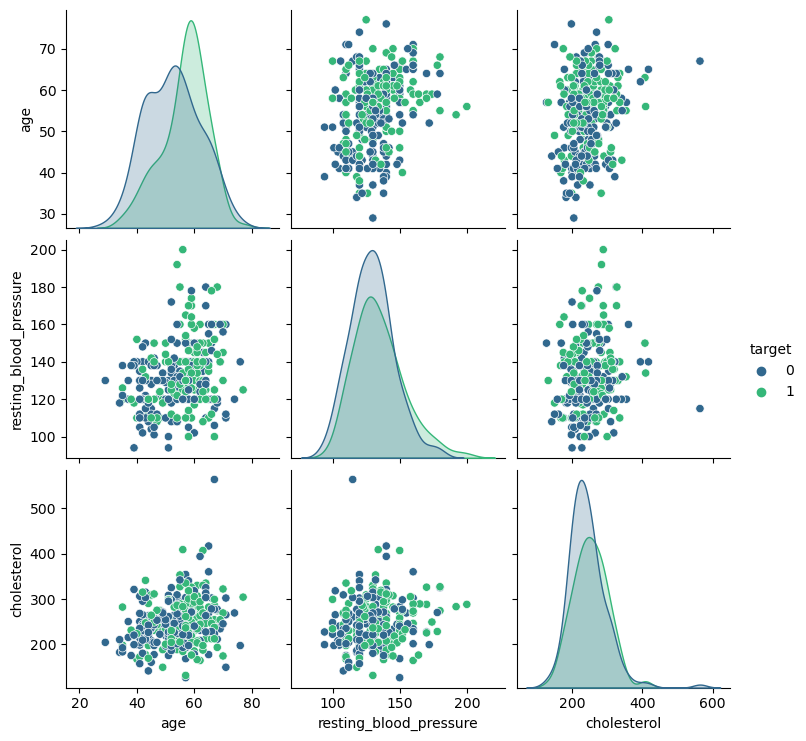

In [32]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'], palette ='viridis' )

From the above plotdistribution we cna say that as the age increases chances of heart disease increases

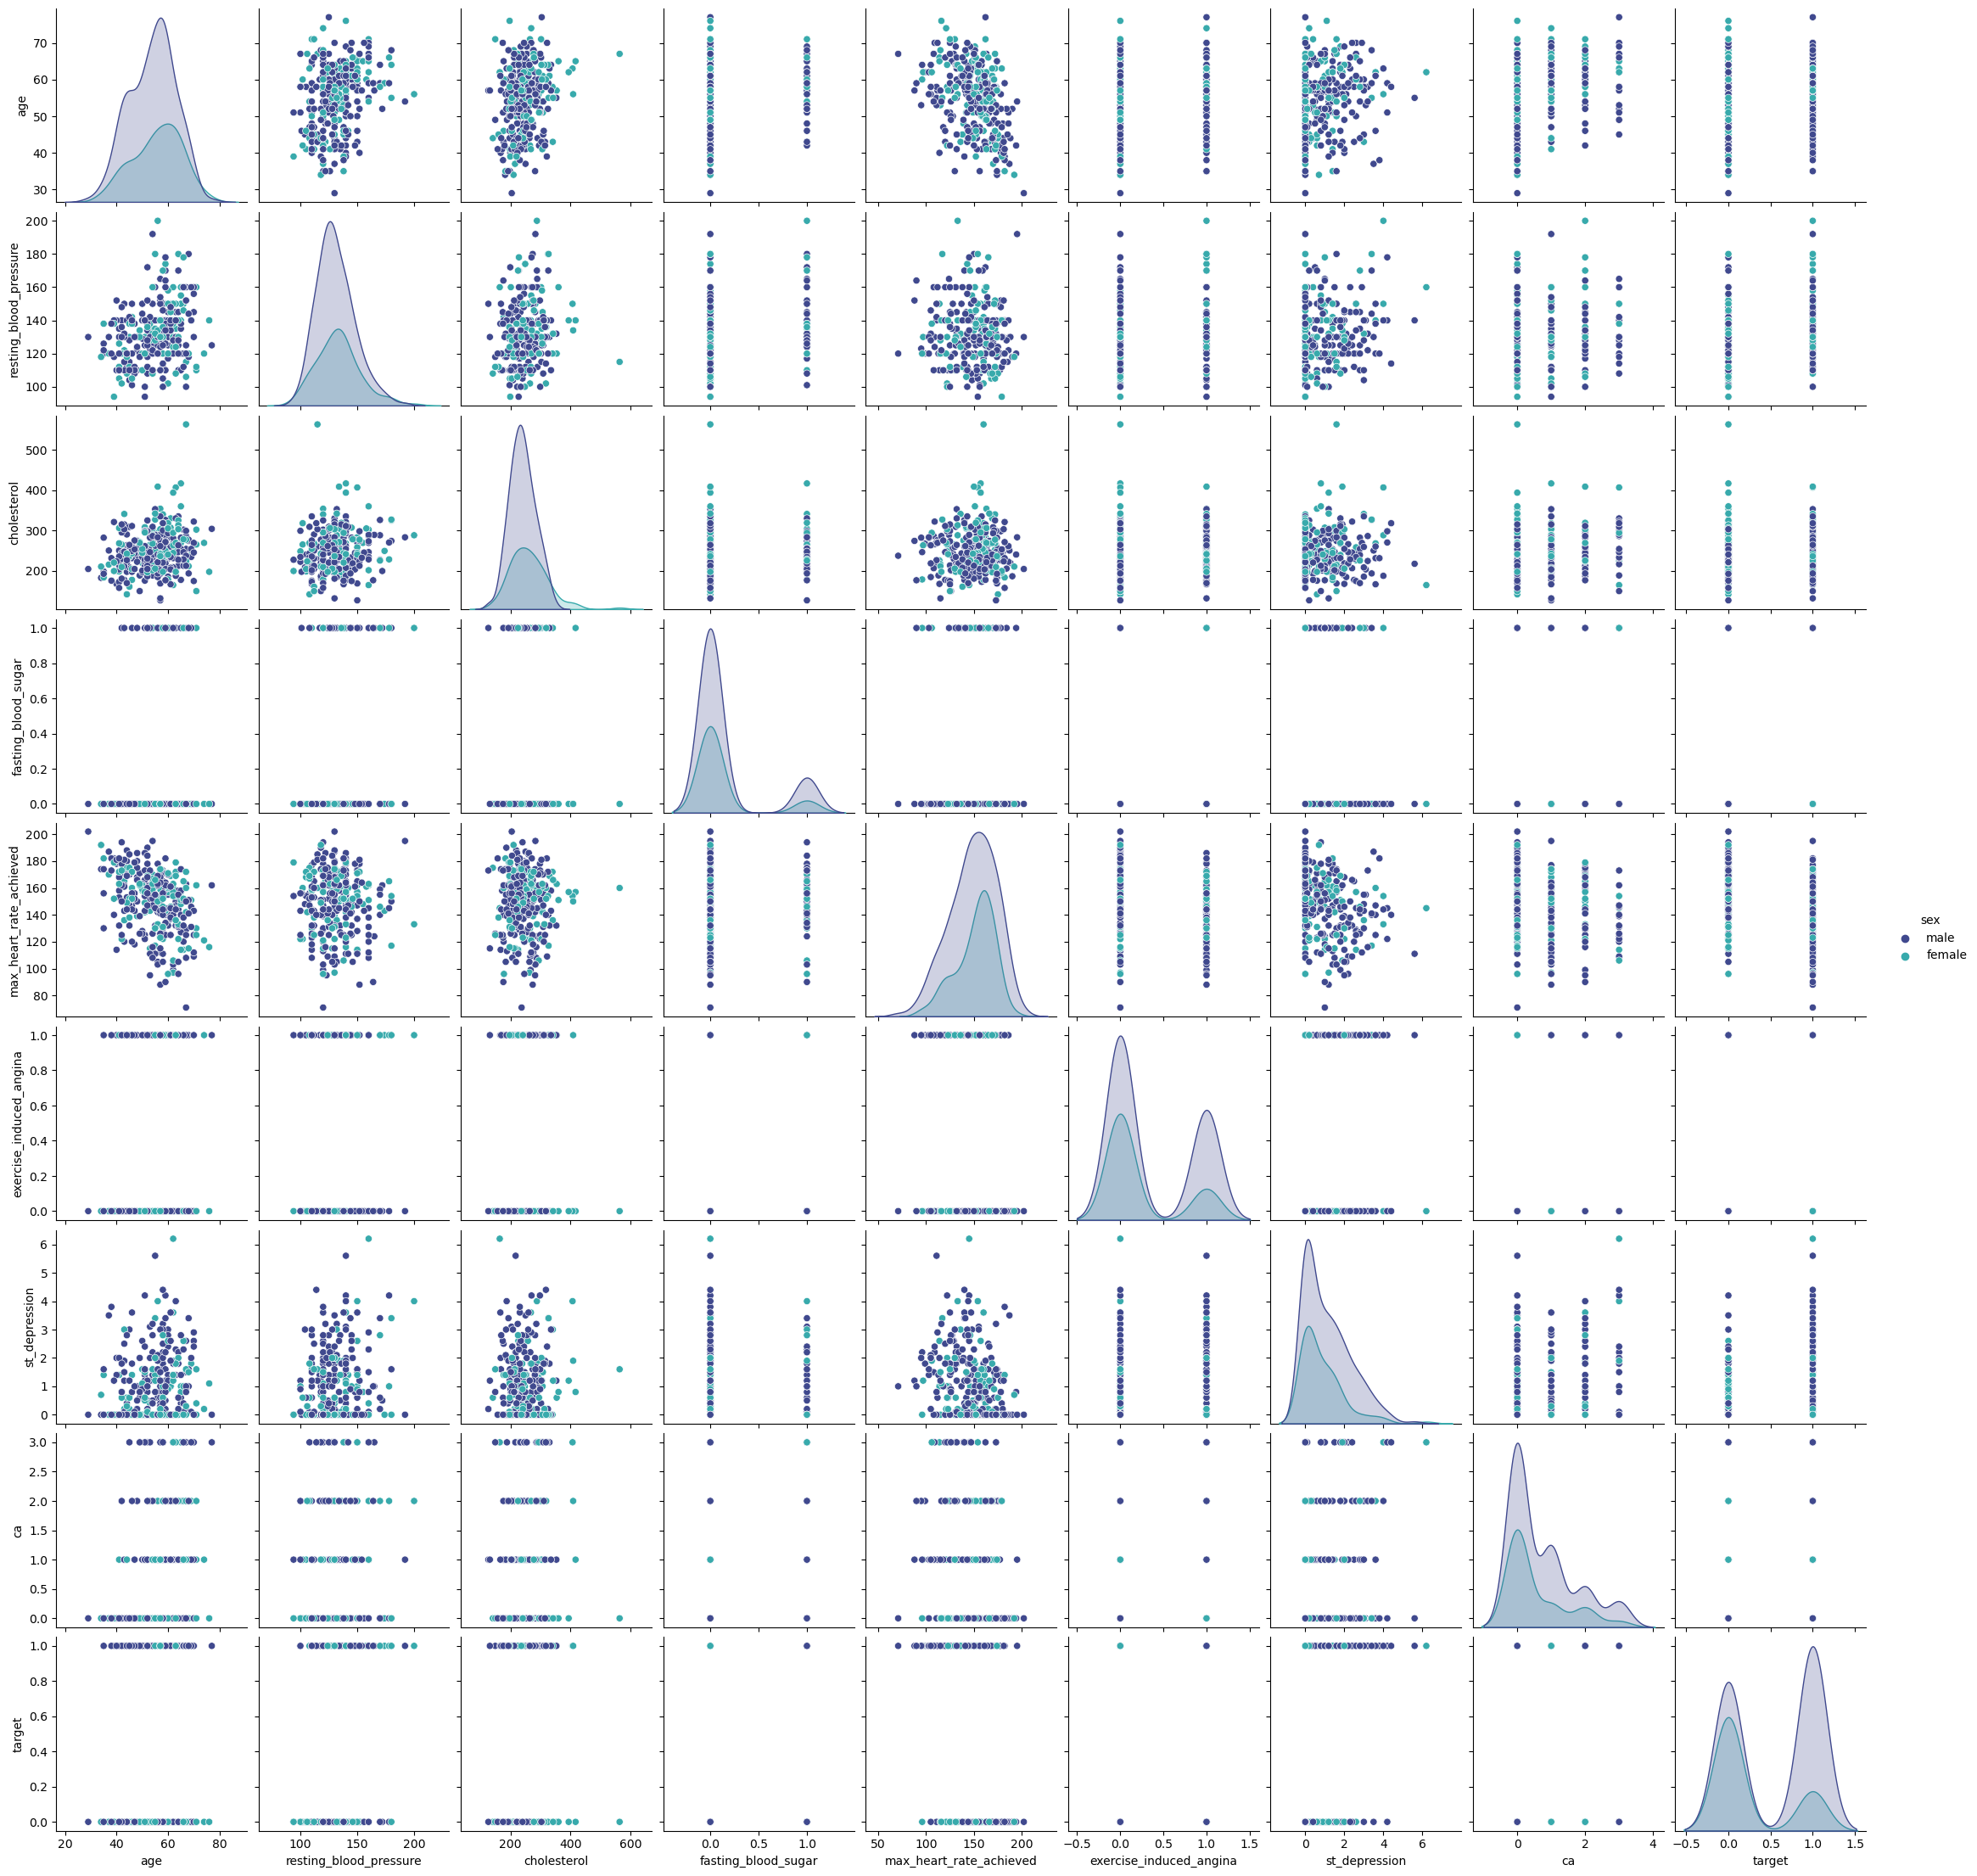

In [33]:
sns.pairplot(df, hue ='sex',palette = 'mako' )

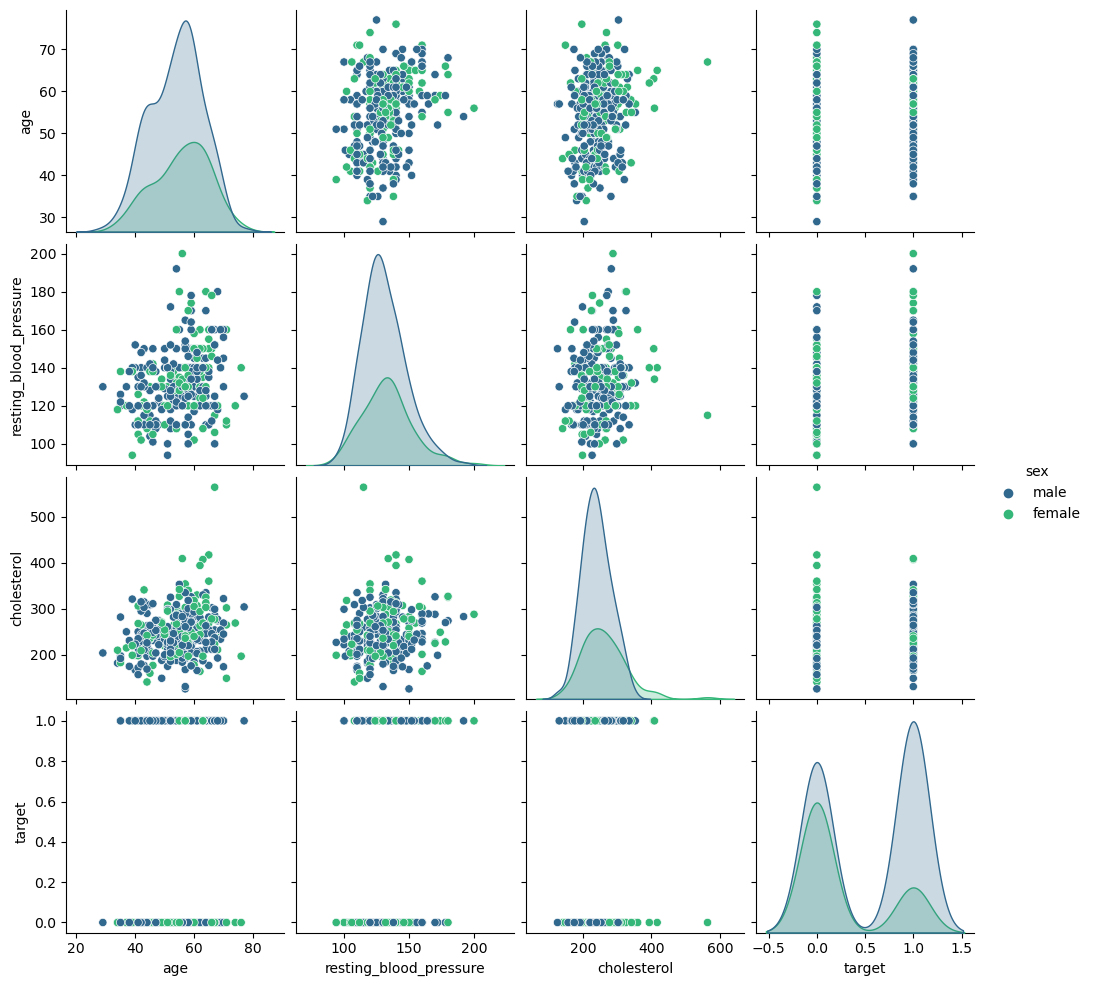

In [34]:
sns.pairplot(df, hue = 'sex', vars = ['age', 'resting_blood_pressure', 'cholesterol', 'target'], palette ='viridis' )

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

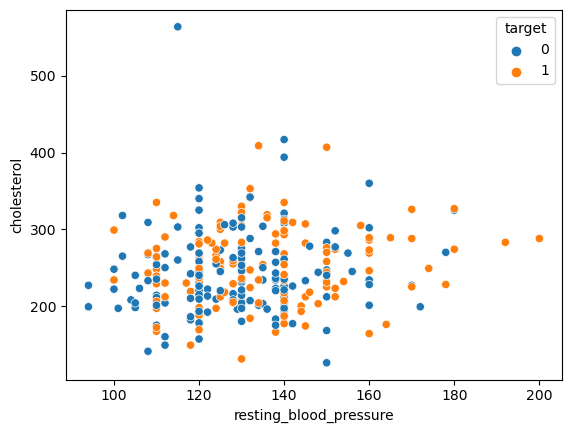

In [35]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = df)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

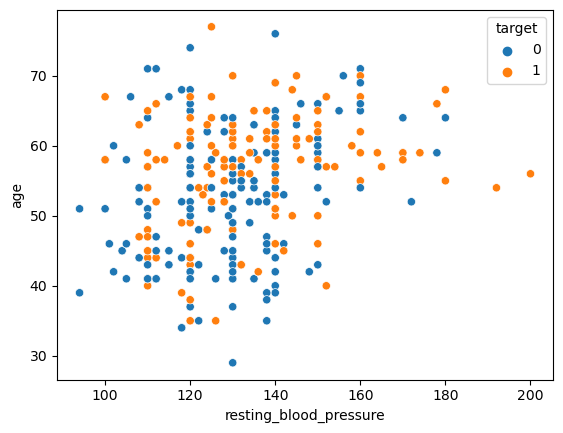

In [36]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df)

In [37]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_reversible defect
0,63,145,233,1,150,0,2.3,0,0,1,0,0,1,1,0,0,0,1,0
1,67,160,286,0,108,1,1.5,3,1,1,0,0,0,1,0,1,0,0,0
2,67,120,229,0,129,1,2.6,2,1,1,0,0,0,1,0,1,0,0,1
3,37,130,250,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0,0,0
4,41,130,204,0,172,0,1.4,0,0,0,1,0,0,1,0,0,1,0,0


In [38]:
df.shape

(303, 19)

In [39]:
X = df.drop(['target'],axis=1)
y = df['target']

## Checking Correlation

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

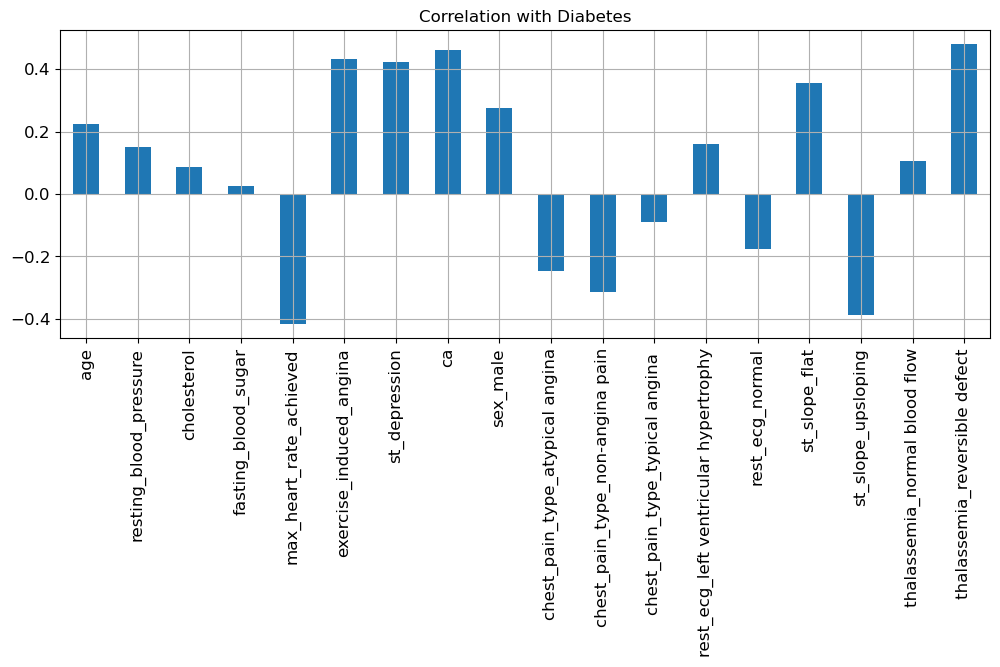

In [40]:
X.corrwith(y).plot.bar(
        figsize = (12, 4), title = "Correlation with Diabetes", fontsize = 12,
        rot = 90, grid = True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
   X,y, test_size=0.2, random_state=9
)

In [42]:
print(X.shape,X_train.shape, X_test.shape)

(303, 18) (242, 18) (61, 18)


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_reversible defect
132,0.000000,0.339623,0.178082,0,1.000000,0,0.000000,0,1,1,0,0,1,0,0,1,0,0
192,0.291667,0.358491,0.276256,1,0.549618,1,0.016129,0,1,0,0,0,1,0,1,0,0,1
215,0.562500,0.245283,0.152968,0,0.694656,0,0.306452,0,1,0,0,1,1,0,1,0,0,1
213,0.770833,0.792453,0.232877,1,0.717557,1,0.161290,2,0,0,0,0,0,1,1,0,0,1
229,0.770833,0.169811,0.196347,0,0.465649,1,0.016129,1,1,0,0,0,1,0,0,1,0,0


In [44]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-angina pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,thalassemia_normal blood flow,thalassemia_reversible defect
81,0.500000,0.339623,0.315068,0,0.549618,0,0.064516,0,0,0,0,0,1,0,1,0,0,0
38,0.541667,0.358491,0.518265,0,0.465649,1,0.193548,1,1,0,0,0,0,1,1,0,0,1
13,0.312500,0.245283,0.312785,0,0.778626,0,0.000000,0,1,1,0,0,0,1,0,1,0,1
100,0.333333,0.198113,0.305936,0,0.870229,0,0.000000,0,1,0,0,0,1,0,0,1,0,0
158,0.645833,0.433962,0.381279,0,0.755725,0,0.193548,2,1,0,0,0,1,0,1,0,0,1


In [45]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [46]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.839000 (0.081735)
KNN7: 0.847333 (0.082849)
KNN5: 0.855667 (0.090790)
KNN9: 0.830833 (0.083424)
KNN11: 0.827000 (0.098016)
CART: 0.719500 (0.060553)
SVM Linear: 0.838833 (0.088113)
SVM RBF: 0.839167 (0.079149)
RF_Ent100: 0.830500 (0.082125)
ET100: 0.818333 (0.061558)
MLP: 0.830667 (0.086024)
SGD3000: 0.806333 (0.072525)


Random Forest Classifier (criterion = 'entropy')

In [47]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

K nearest neighbour (n=9)

In [48]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

Extra Tree Classifier (n_estimators=100)

In [49]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)

Support Vector Classifier (kernel='linear')

In [50]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

Stochastic Gradient Descent

In [52]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

decision Tree Classifier (CART)

In [53]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

Model Evaluation

In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve

## Mathew Correlation coefficient (MCC)
The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

<img src="https://miro.medium.com/max/1400/1*R6_BTaMSdCLdNBa0oauFQQ.png" width = "800" >


## Log Loss
Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

<img src = "https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png" width = "500">

## F1 Score
F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2(Recall Precision) / (Recall + Precision)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.836066,0.862069,0.806452,0.866667,0.833333,0.836559,5.662147,0.673843


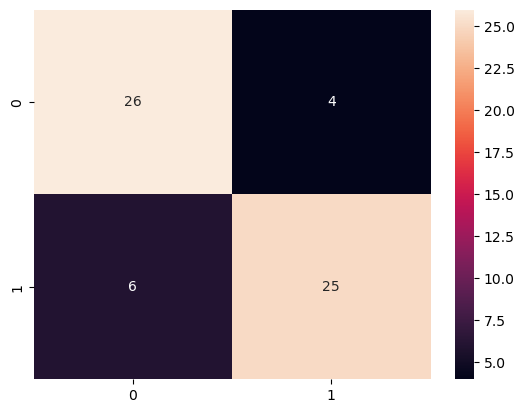

In [54]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results


Comparison with other Models

In [55]:
data = {        'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et_100, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd, 
                'CART': y_pred_decc, 
                'LR': y_pred_lr }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.836066,0.862069,0.806452,0.866667,0.833333,0.836559,5.662147,0.673843
1,KNN,0.754098,0.785714,0.709677,0.800000,0.745763,0.754839,8.493220,0.511330
2,EXtra tree classifier,0.721311,0.705882,0.774194,0.666667,0.738462,0.720430,9.625692,0.443732
3,SVC,0.819672,0.857143,0.774194,0.866667,0.813559,0.820430,6.228356,0.642938
4,SGD,0.737705,0.741935,0.741935,0.733333,0.741935,0.737634,9.059456,0.475269
5,CART,0.786885,0.781250,0.806452,0.766667,0.793651,0.786559,7.360815,0.573736
6,LR,0.803279,0.827586,0.774194,0.833333,0.800000,0.803763,6.794579,0.608181


AS we can see from above results Random Forest is best performer as it has highest test accuracy of 0.8360, sensitivity of 0.8387 and specificity of 0.83 and highest f1-score of 0.8387 and lowest Log Loss of 5.6.